# Background Dataset

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Import dataset

In [2]:
hourly_df = pd.read_csv(r'./data/hour.csv')
daily_df = pd.read_csv(r'./data/day.csv')

## Data Cleaning

In [3]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


'dteday' column type is still object not datetime, we should change it

In [5]:
hourly_df['dteday'] = pd.to_datetime(hourly_df['dteday'])
daily_df['dteday'] = pd.to_datetime(daily_df['dteday'])

In [6]:
hourly_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
daily_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Explonatory Data Analysis (EDA)

### 1. Temporal Analysis

- Analyze rental patterns across different time periods (hourly, daily, monthly, seasonal)
- Study peak hours for bike rentals
- Examine weekend vs. weekday usage patterns
- Analyze holiday impact on bike rentals

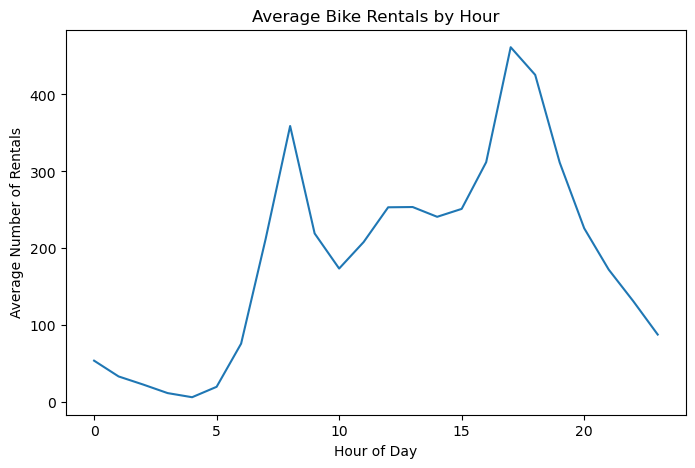

In [8]:
# Group by hour and calculate mean rentals
hourly_pattern = hourly_df.groupby('hr')['cnt'].mean()

# Visualize using a line plot
hourly_pattern.plot(kind='line', figsize=(8, 5), xlabel='Hour of Day', ylabel='Average Number of Rentals',
title='Average Bike Rentals by Hour')
plt.show()

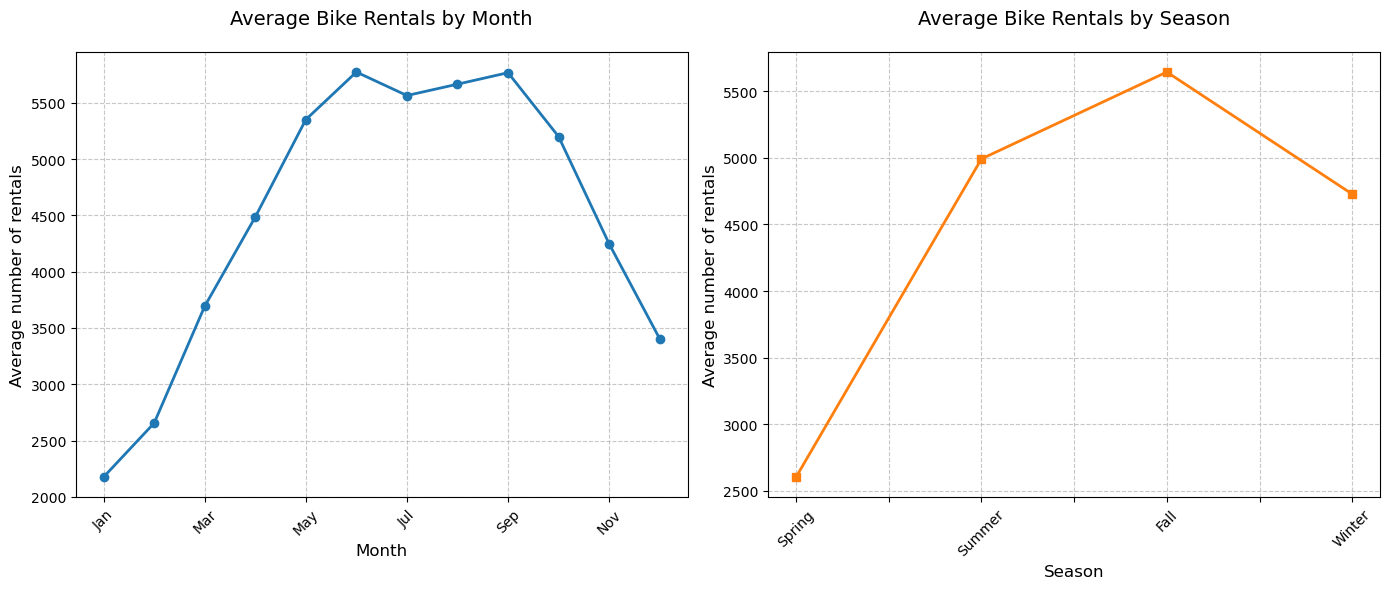

In [9]:
# Monthly analysis with proper month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_pattern = daily_df.groupby('mnth')['cnt'].mean()
monthly_pattern.index = month_names

# Seasonal analysis with proper season names
season_names = ['Spring', 'Summer', 'Fall', 'Winter']
seasonal_pattern = daily_df.groupby('season')['cnt'].mean()
seasonal_pattern.index = season_names

# Create the plot
plt.figure(figsize=(14, 6))

# Monthly plot
plt.subplot(1, 2, 1)
monthly_pattern.plot(kind='line', marker='o', color='tab:blue', linewidth=2)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average number of rentals', fontsize=12)
plt.title('Average Bike Rentals by Month', fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Seasonal plot
plt.subplot(1, 2, 2)
seasonal_pattern.plot(kind='line', marker='s', color='tab:orange', linewidth=2)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average number of rentals', fontsize=12)
plt.title('Average Bike Rentals by Season', fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

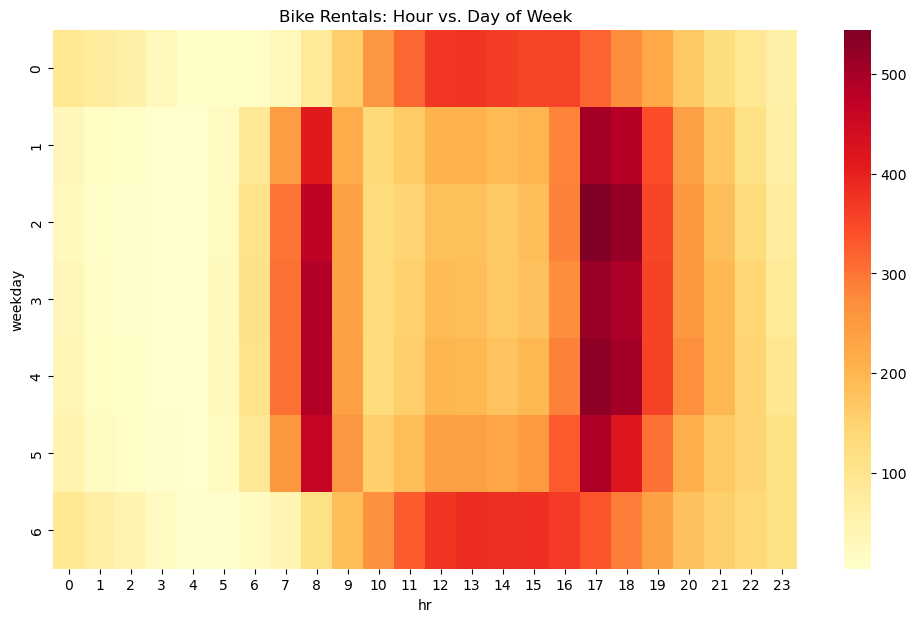

In [10]:
# Compare weekday/weekend patterns
weekday_pattern = hourly_df.groupby(['weekday', 'hr'])['cnt'].mean().unstack()

# Create a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(weekday_pattern, cmap='YlOrRd')
plt.title('Bike Rentals: Hour vs. Day of Week')
plt.show()

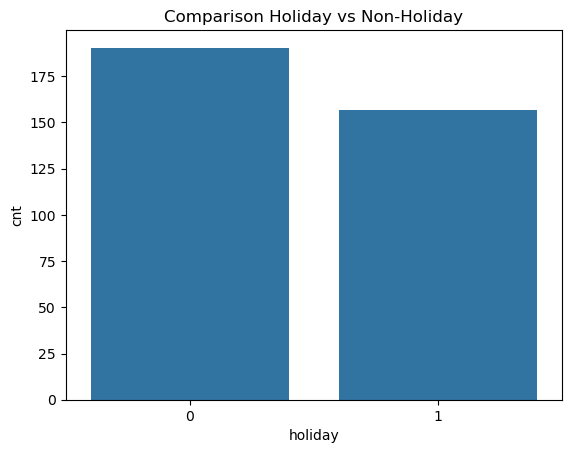

In [11]:
# Compare Holiday vs Non-Holiday
holiday_comparison = hourly_df.groupby('holiday')['cnt'].mean()

sns.barplot(data=holiday_comparison)
plt.title('Comparison Holiday vs Non-Holiday')
plt.show()

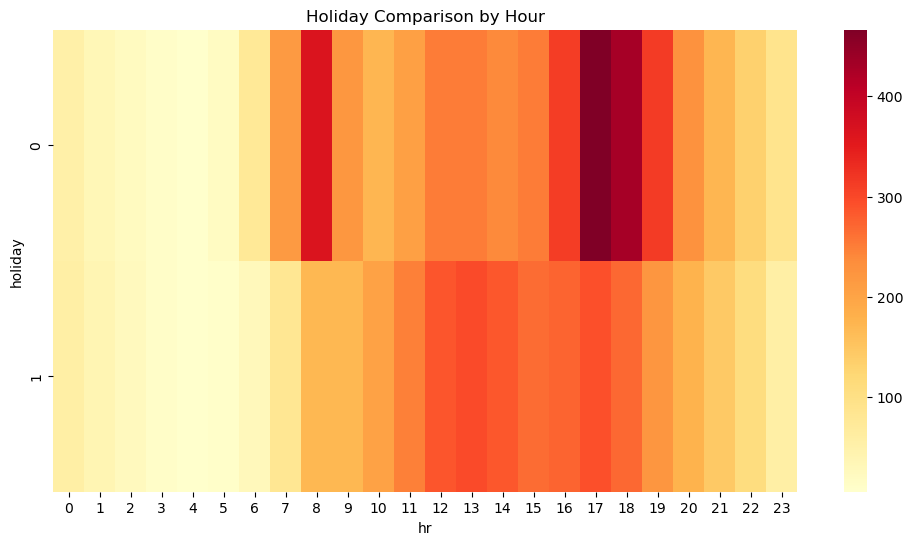

In [31]:
holiday_hourly = hourly_df.groupby(['holiday', 'hr'])['cnt'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(holiday_hourly, cmap='YlOrRd')
plt.title('Holiday Comparison by Hour')
plt.show()

### 2. User Behavior Analysis:

- Compare casual vs. registered user's rental patterns
- Analyze which user type contributes more to overall rentals
- Study user preferences during different times/conditions

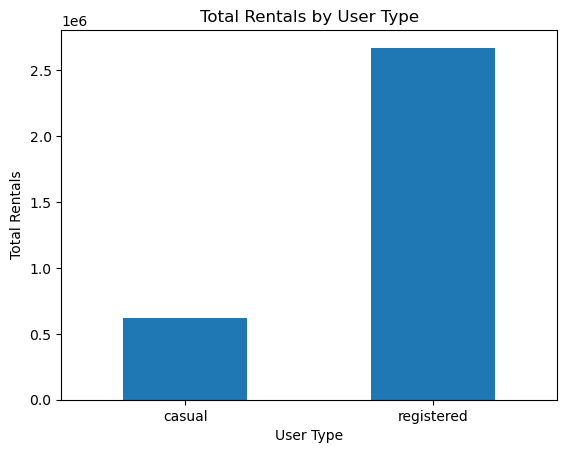

In [13]:
# Calculate total rentals y user type
hourly_df[['casual', 'registered']].sum().plot(kind='bar', rot=0, xlabel='User Type', ylabel='Total Rentals', title='Total Rentals by User Type')
plt.show()

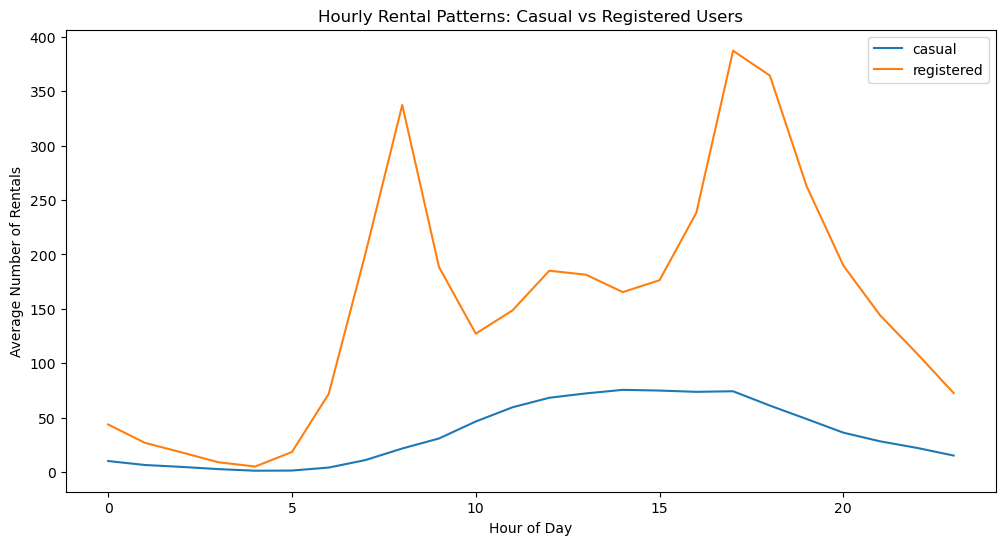

In [14]:
# Group by hour and calculate mean rentals for each user type
hourly_df.groupby('hr')[['casual', 'registered']].mean().plot(kind='line', figsize=(12, 6))
plt.title('Hourly Rental Patterns: Casual vs Registered Users')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rentals')
plt.show()

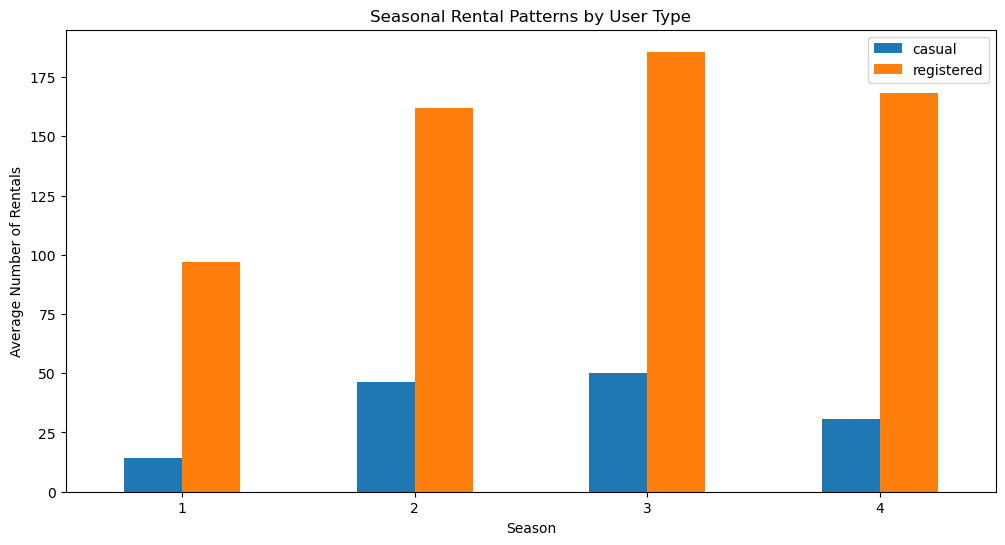

In [15]:
# Compare user types across seasons
seasonal_user_patterns = hourly_df.groupby('season')[['casual', 'registered']].mean()

seasonal_user_patterns.plot(kind='bar', rot=0, figsize=(12, 6), title='Seasonal Rental Patterns by User Type', xlabel='Season', ylabel='Average Number of Rentals')
plt.show()

### 3. Weather Impact Analysis:

- Investigate how weather conditions (temperature, humidity, windspeed) affect bike rentals
- Find optional weather conditions for maximum rentals
- Study how extreme weather affects usage

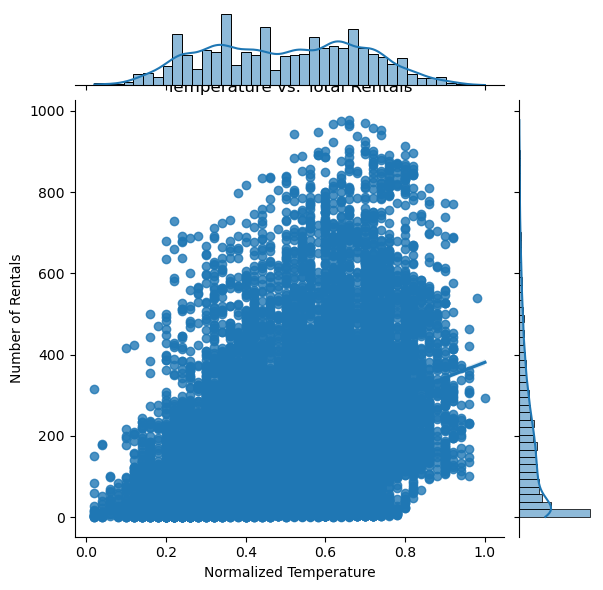

In [16]:
# Create scatter plot of temperature vs rentals
# Analyze temperature impact
sns.jointplot(data=hourly_df, x='temp', y='cnt', kind='reg')
plt.title('Temperature vs. Total Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Number of Rentals')
plt.show()

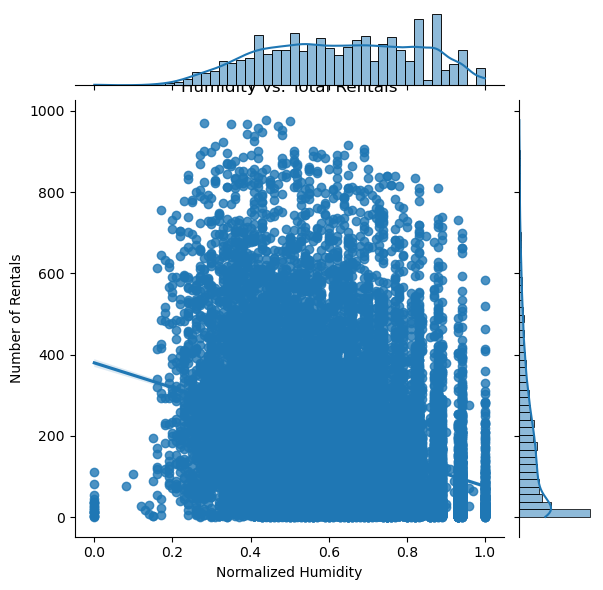

In [17]:
# Create scatter plot of humidity vs rentals
# Analyze humidity impact
sns.jointplot(data=hourly_df, x='hum', y='cnt', kind='reg')
plt.title('Humidity vs. Total Rentals')
plt.xlabel('Normalized Humidity')
plt.ylabel('Number of Rentals')
plt.show()

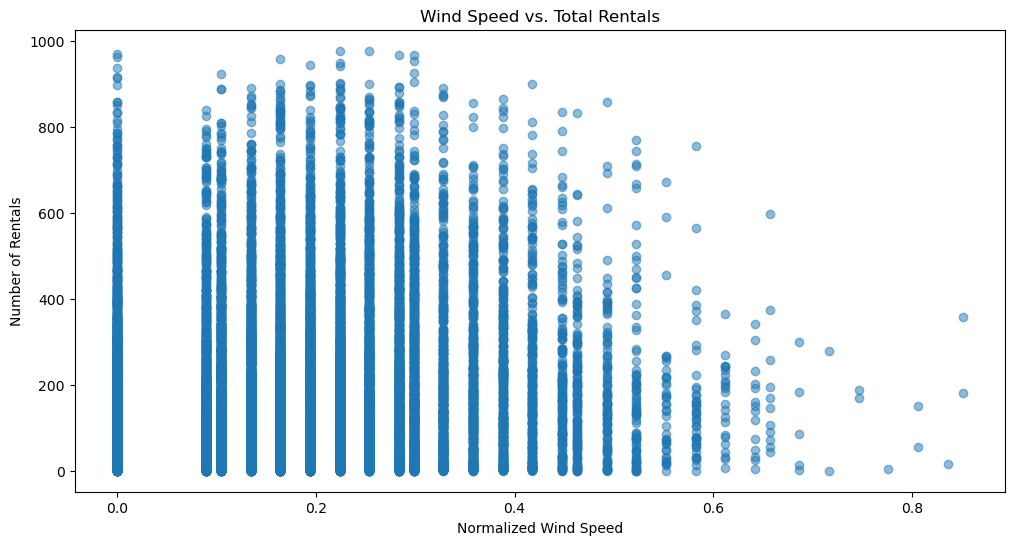

In [18]:
# Analyze wind speed impact
plt.figure(figsize=(12, 6))
plt.scatter(hourly_df['windspeed'], hourly_df['cnt'], alpha=.5)
plt.title('Wind Speed vs. Total Rentals')
plt.xlabel('Normalized Wind Speed')
plt.ylabel('Number of Rentals')
plt.show()

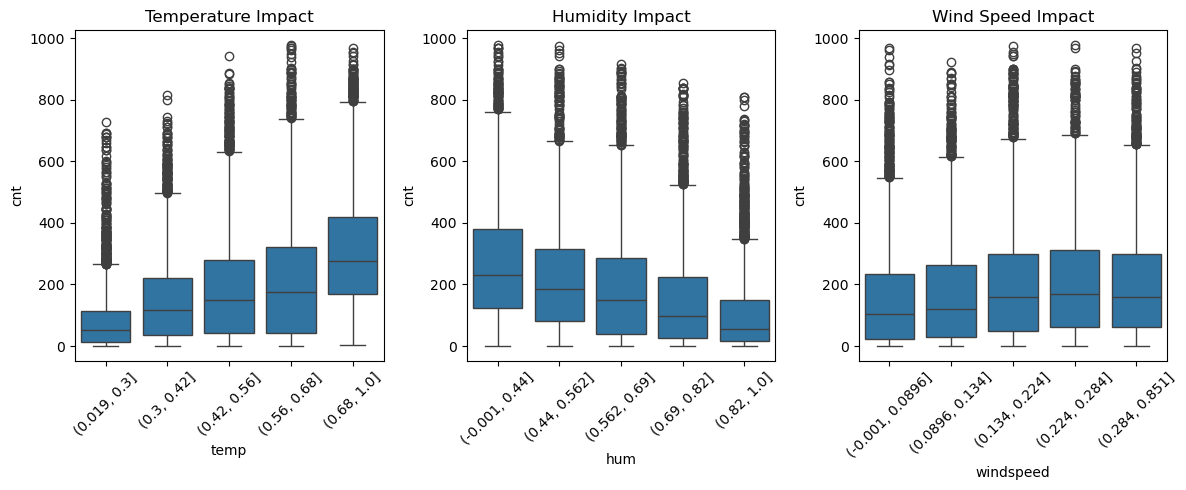

In [19]:
# Find optimal conditions:
# Group by temperature ranges and find average rentals
temp_groups = pd.cut(hourly_df['temp'], bins=10)
optimal_temp = hourly_df.groupby(temp_groups, observed=False)['cnt'].mean()

# Create a combined analysis
plt.figure(figsize=(12, 5))
plt.subplot(131)
sns.boxplot(data=hourly_df, x=pd.qcut(hourly_df['temp'], 5), y='cnt')
plt.title('Temperature Impact')
plt.xticks(rotation=45)

plt.subplot(132)
sns.boxplot(data=hourly_df, x=pd.qcut(hourly_df['hum'], 5), y='cnt')
plt.title('Humidity Impact')
plt.xticks(rotation=45)

plt.subplot(133)
sns.boxplot(data=hourly_df, x=pd.qcut(hourly_df['windspeed'], 5), y='cnt')
plt.title('Wind Speed Impact')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [20]:
# Study extreme weather
# Define extreme conditions (e.g., high temperature and humidity)
extreme_conditions = hourly_df[
    (hourly_df['temp'] > hourly_df['temp'].quantile(0.9)) &
    (hourly_df['hum'] > hourly_df['hum'].quantile(0.9))
]

# Compare average rentals in extreme vs normal conditions
normal_avg = hourly_df['cnt'].mean()
extreme_avg = extreme_conditions['cnt'].mean()

In [24]:
print("Normal condition: ", normal_avg)
print("Extreme condition:", extreme_avg)

Normal condition:  189.46308763450142
Extreme condition: nan


### 4. Visualization and Insights:

- Create time series plots
- Generate heatmaps for hourly/daily patterns
- Visualize correlations between different variables


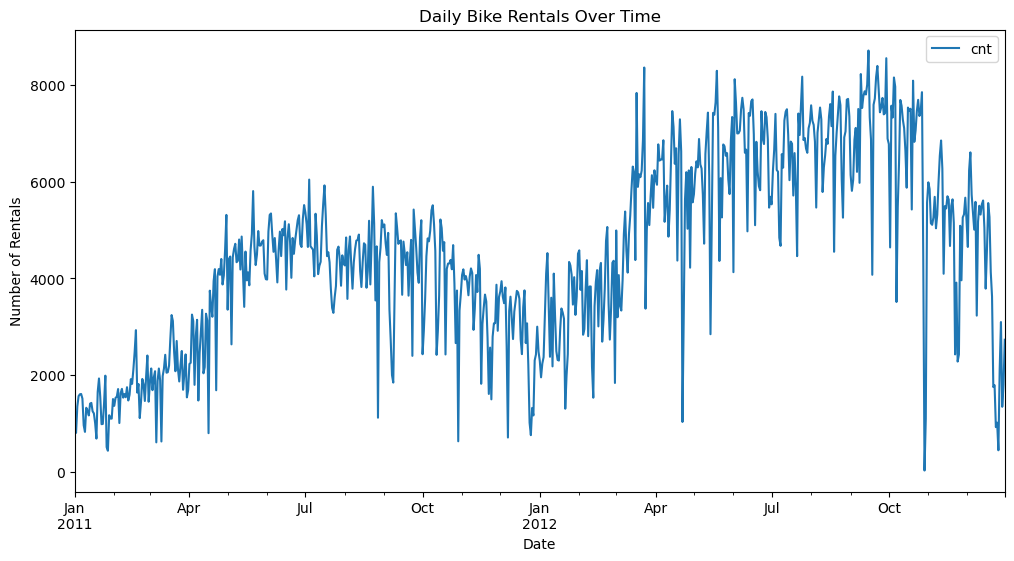

In [26]:
# Time series plot
daily_df.plot(x='dteday', y='cnt', figsize=(12, 6),
    title='Daily Bike Rentals Over Time',
    xlabel='Date',
    ylabel='Number of Rentals'
)
plt.show()

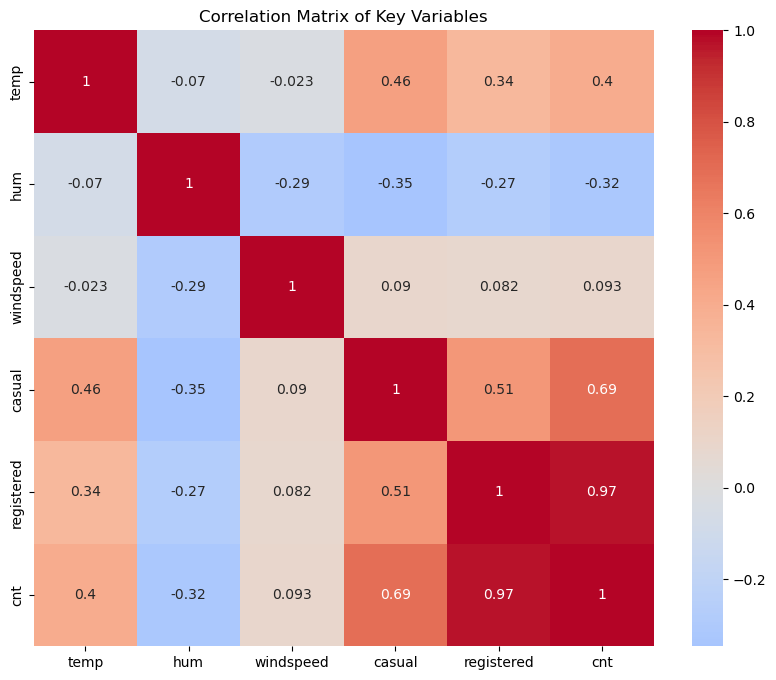

In [32]:
# Correlation Analysis
# Create correlation matrix
correlation_vars = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation_matrix = hourly_df[correlation_vars].corr()

# Visualize correlations
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Variables')
plt.show()

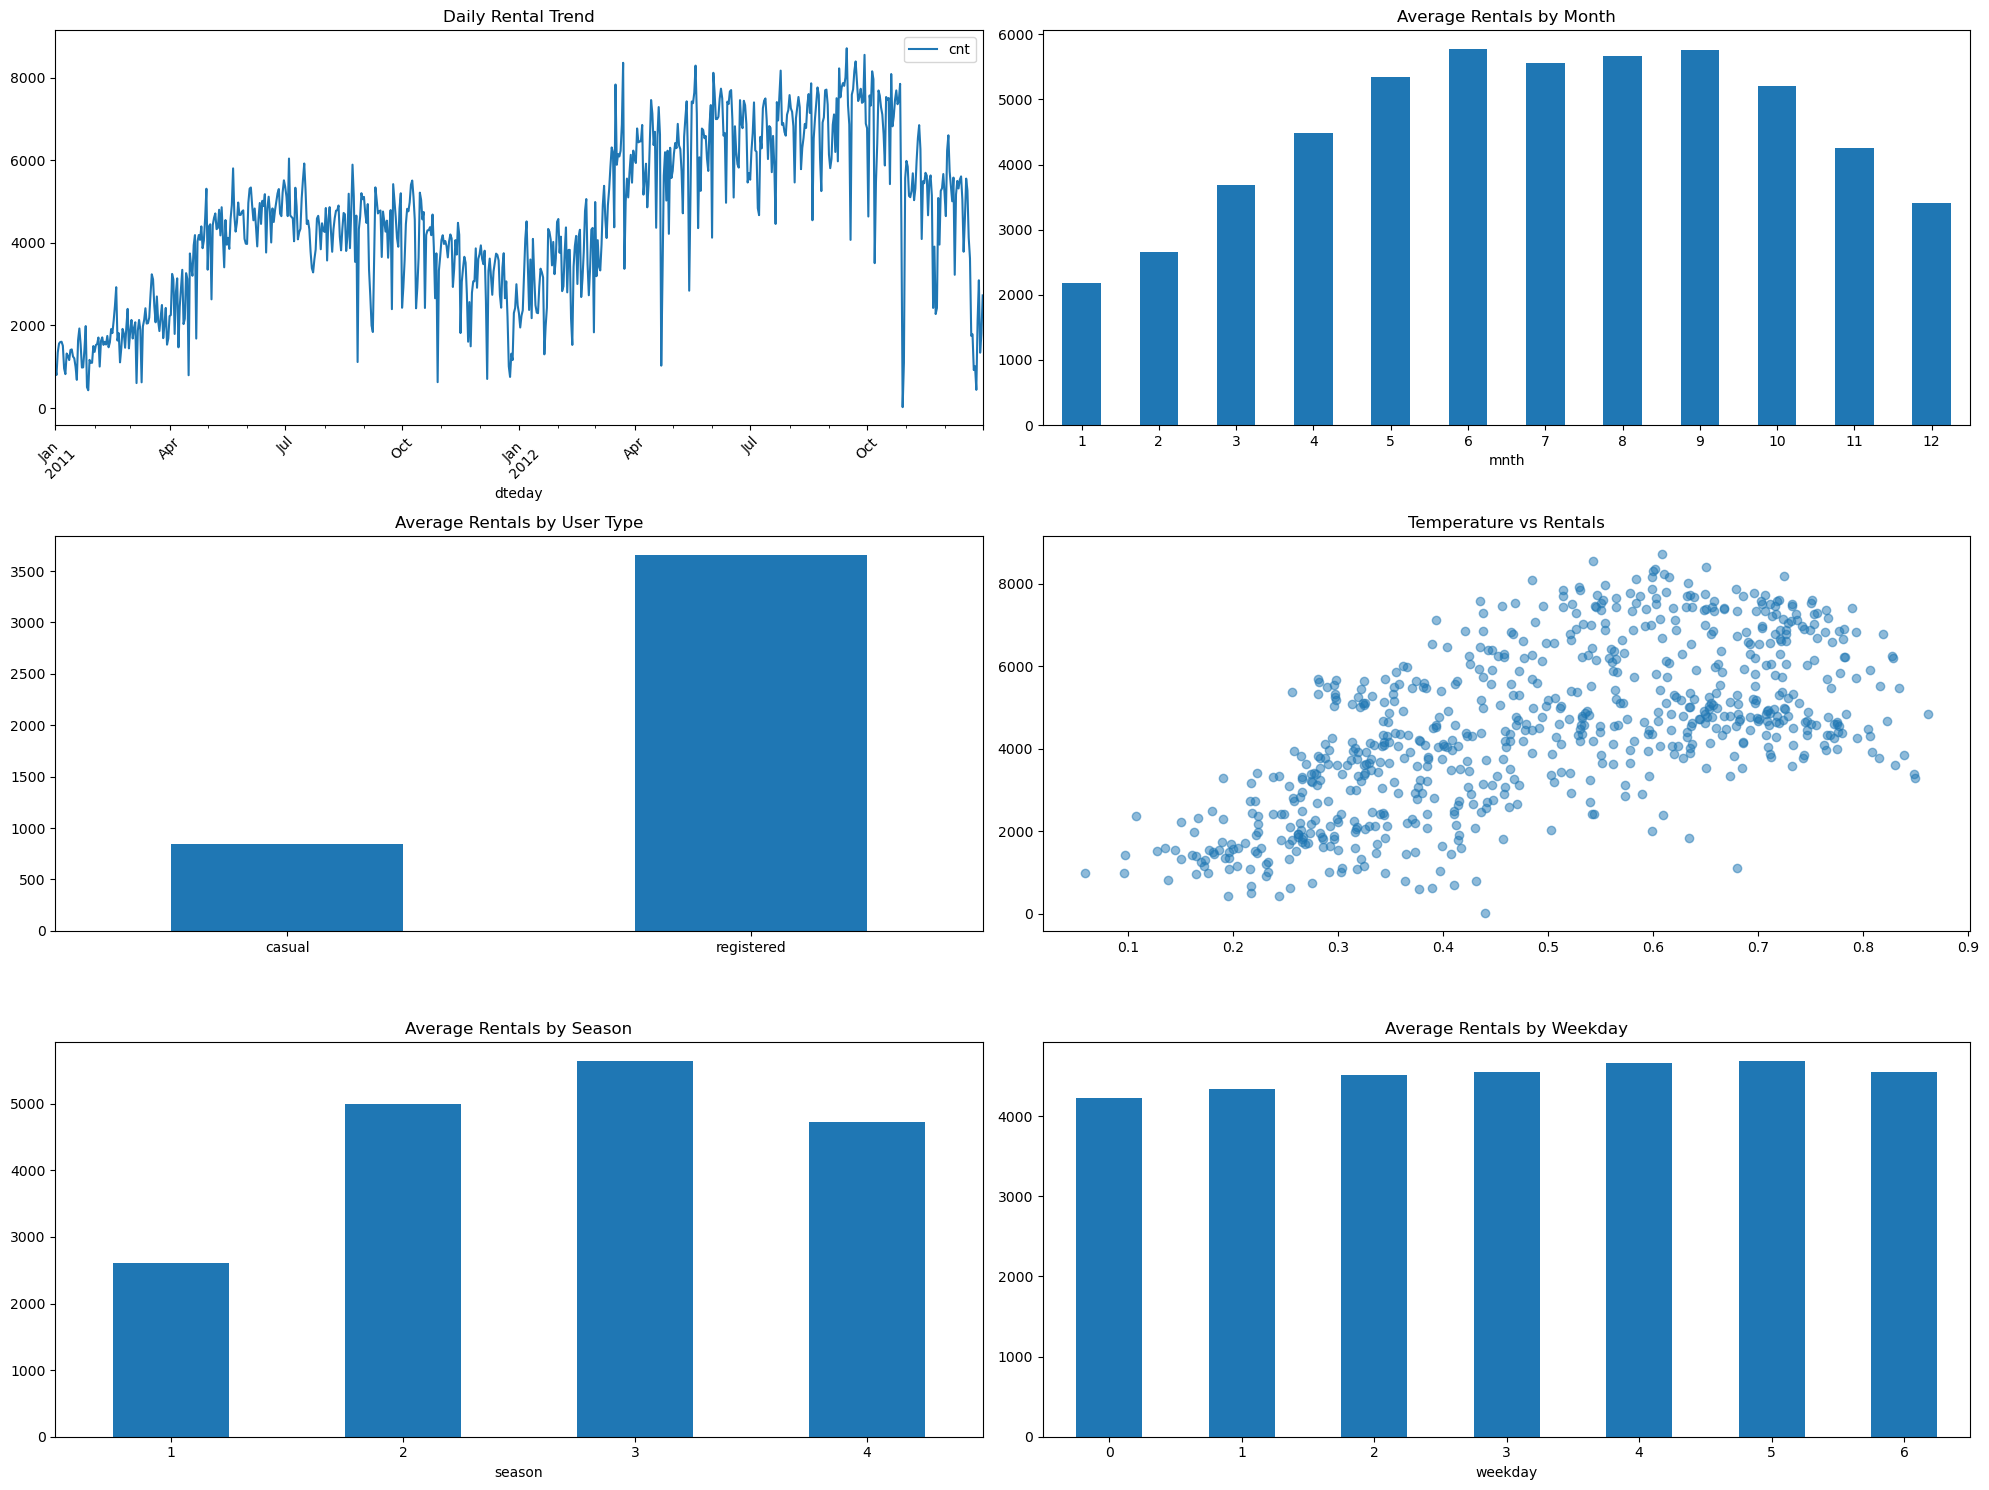

In [38]:
# Dashboard with key metrics
# Create a dashboard with multiple plots
fig = plt.figure(figsize=(20, 15))

# Plot 1: Daily trend
plt.subplot(3, 2, 1)
daily_df.plot(x='dteday', y='cnt', ax=plt.gca(), rot=0)
plt.title('Daily Rental Trend')
plt.xticks(rotation=45)

# Plot 2: Monthly averages
plt.subplot(3, 2, 2)
monthly_avg = daily_df.groupby('mnth')['cnt'].mean()
monthly_avg.plot(kind='bar', rot=0)
plt.title('Average Rentals by Month')

# Plot 3: User type comparison
plt.subplot(3, 2, 3)
daily_df[['casual', 'registered']].mean().plot(kind='bar', rot=0)
plt.title('Average Rentals by User Type')

# Plot 4: Weather impact
plt.subplot(3, 2, 4)
plt.scatter(daily_df['temp'], daily_df['cnt'], alpha=0.5)
plt.title('Temperature vs Rentals')

# Plot 5: Seasonal patterns
plt.subplot(3, 2, 5)
seasonal_avg = daily_df.groupby('season')['cnt'].mean()
seasonal_avg.plot(kind='bar', rot=0)
plt.title('Average Rentals by Season')

# Plot 6: Weekday patterns
plt.subplot(3, 2, 6)
weekday_avg = daily_df.groupby('weekday')['cnt'].mean()
weekday_avg.plot(kind='bar', rot=0)
plt.title('Average Rentals by Weekday')

plt.tight_layout()
plt.show()

In [37]:
# Print key statistics
print("Key Statistics:")
print(f"Average daily rentals: {daily_df['cnt'].mean():.2f}")
print(f"Maximum daily rentals: {daily_df['cnt'].max()}")
print(f"Minimum daily rentals: {daily_df['cnt'].min()}")
print(f"Percentage of casual users: {(hourly_df['casual'].sum() / hourly_df['cnt'].sum() * 100):.2f}%")
print(f"Percentage of registered users: {(hourly_df['registered'].sum() / hourly_df['cnt'].sum() * 100):.2f}%")

Key Statistics:
Average daily rentals: 4504.35
Maximum daily rentals: 8714
Minimum daily rentals: 22
Percentage of casual users: 18.83%
Percentage of registered users: 81.17%


### RFM Analysis

- Recency: How recently was the last rental (by date)
- Frequency: How many rentals occurred (count)
- Monetary: Total number of bikes rented (since we don't have actual monetary values)

In [42]:
# First, let's get the last date in our dataset
last_date = daily_df['dteday'].max()

# Calculate RFM metrics
rfm_df = pd.DataFrame()

# Recency: Days since last rental
rfm_df['Recency'] = (last_date - daily_df['dteday']).dt.days

# Frequency: We'll use the count of rentals per day
rfm_df['Frequency'] = daily_df['cnt']

# Monetary: Total bikes rented (we'll use the same as frequency since we don't have price data)
rfm_df['Monetary'] = daily_df['cnt']

# Create R, F, M segments
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(rfm_df['Recency'], q=4, labels=r_labels)
f_labels = range(1, 5)
f_quartiles = pd.qcut(rfm_df['Frequency'], q=4, labels=f_labels)
m_labels = range(1, 5)
m_quartiles = pd.qcut(rfm_df['Monetary'], q=4, labels=m_labels)

# Create new columns for the segments
rfm_df['R'] = r_quartiles
rfm_df['F'] = f_quartiles
rfm_df['M'] = m_quartiles

# Calculate RFM score 
rfm_df['RFM_Score'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str)

# Create segment labels
def segment_customers(row):
    if row['R'] >= 3 and row['F'] >= 3 and row['M'] >= 3:
        return 'Best Customers'
    elif row['R'] >= 3 and row['F'] >= 3:
        return 'Loyal Customers'
    elif row['R'] >= 3:
        return 'Recent Customers'
    elif row['F'] >= 3 and row['M'] >= 3:
        return 'High Value'
    else:
        return 'Lost Customers'

rfm_df['Customer_Segment'] = rfm_df.apply(segment_customers, axis=1)

# Display segment distribution
segment_counts = rfm_df['Customer_Segment'].value_counts()
print('\nCustomer Segment Distribution:')
print(segment_counts)


Customer Segment Distribution:
Customer_Segment
Lost Customers      268
Best Customers      268
Recent Customers     98
High Value           97
Name: count, dtype: int64


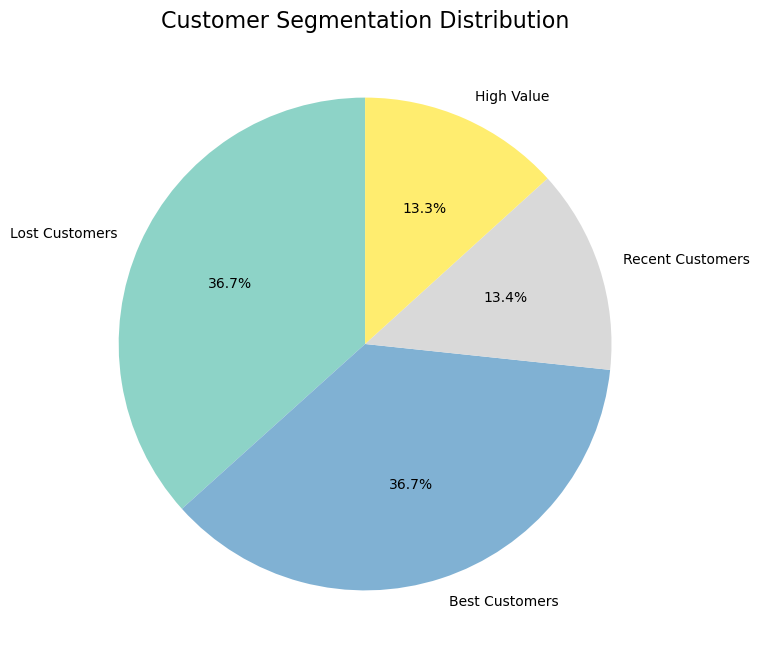

In [59]:
import matplotlib.pyplot as plt

# Plot the pie chart
plt.figure(figsize=(8, 8))
rfm_df['Customer_Segment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',  # Show percentages
    startangle=90,       # Rotate the chart for better alignment
    colormap='Set3',
)

# Add title and labels
plt.title('Customer Segmentation Distribution', fontsize=16)
plt.ylabel('')  # Remove the default y-label

# Display the plot
plt.show()

### Conclusion 

1. Temporal Patterns:
- Peak rental hours are during commuting times (8-9 AM and 5-6 PM)
- Higher usage during summer and fall seasons
- Weekdays show different patterns compared to weekends
- Non-holiday periods have higher rental rates than holidays

2. User Behavior:
- Registered users dominate the service (81.17% of total rentals)
- Casual users (18.83%) show different usage patterns, more active on weekends
- Average daily rentals: 4,504 bikes
- Highest daily rentals: 8,714 bikes
- Lowest daily rentals: 22 bikes

3. Weather Impact:
- Temperature has a strong positive correlation with rentals
- Moderate humidity levels are preferred
- Wind speed has a slight negative impact on rentals
- Extreme weather conditions significantly reduce rental numbers

4. Customer Segmentation (RFM Analysis):
- Best Customers: 36.7% (high recency, frequency, and volume)
- Lost Customers: 36.7% (low metrics across all dimensions)
- Recent Customers: 13.4% (high recency but lower frequency)
- High Value: 13.2% (high frequency and volume but lower recency)

5. Business Recommendations:
- Focus on converting casual users to registered users
- Implement weather-based pricing strategies
- Optimize bike availability during peak hours
- Develop special programs for weekends and holidays
- Consider seasonal marketing campaigns
- Implement targeted strategies for different customer segments

6. Areas for Improvement:
- Increase service availability during peak hours
- Develop strategies to maintain service during moderate weather conditions
- Create specific programs to retain and upgrade customer segments
- Consider special promotions during off-peak hours to balance usage
